In [1]:
!pip install fuzzy-c-means

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 4.8 MB/s eta 0:00:00m eta 0:00:010:00:01


In [12]:
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt

In [4]:
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
    [2, 1],
    [1, 2],
    [2, 2],
    [3, 2],
    [6, 6],
    [7, 6],
    [8, 6],
    [6, 7],
    [7, 7],
    [8, 7],
    [9, 7],
    [7, 8],
    [8, 8],
    [9, 8],
    [8, 9],
    [9, 9],
])

In [8]:
fc_means = FCM(n_clusters=2)
fc_means.fit(X)

In [9]:
fc_means.centers

array([[7.68956364, 7.34852446],
       [1.23858776, 1.12497275]])

In [14]:
fcm_labels = fc_means.predict(X)

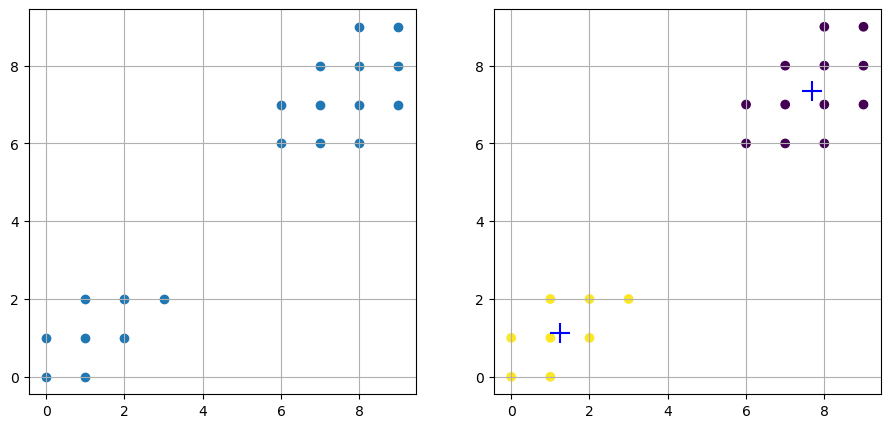

In [20]:
f, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].scatter(X[:, 0], X[:, -1])
axes[1].scatter(X[:, 0], X[:, -1], c=fcm_labels)
axes[1].scatter(
    fc_means.centers[:, 0],
    fc_means.centers[:, -1],
    marker="+",
    s=200,
    c='b'
)
axes[0].grid(True)
axes[1].grid(True)
plt.show()

In [23]:
n_samples = 3000
X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2)),
))

In [22]:
fc_means = FCM(n_clusters=2)
fc_means.fit(X)

In [25]:
fcm_labels = fc_means.predict(X)

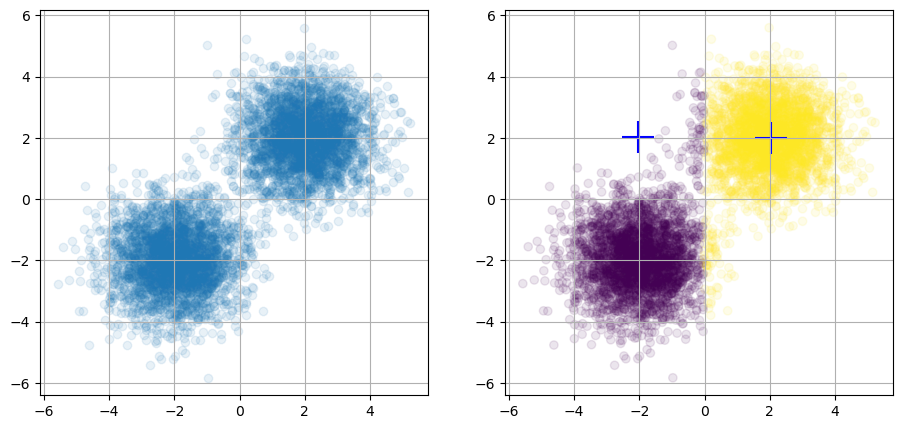

In [26]:
f, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].scatter(X[:, 0], X[:, -1], alpha=.1)
axes[1].scatter(X[:, 0], X[:, -1], c=fcm_labels, alpha=.1)
axes[1].scatter(
    fc_means.centers[:, 0],
    fc_means.centers[:, -1],
    marker="+",
    s=500,
    c='b'
)
axes[0].grid(True)
axes[1].grid(True)
plt.show()

In [27]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=7f33e848f4273eacc5b4039fcc128e83cfe48484ef54b3865c2f34dbc293d687
  Stored in directory: /home/alexander/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [28]:
import skfuzzy as fuzz

https://github.com/scikit-fuzzy/scikit-fuzzy/blob/master/docs/examples/plot_cmeans.py

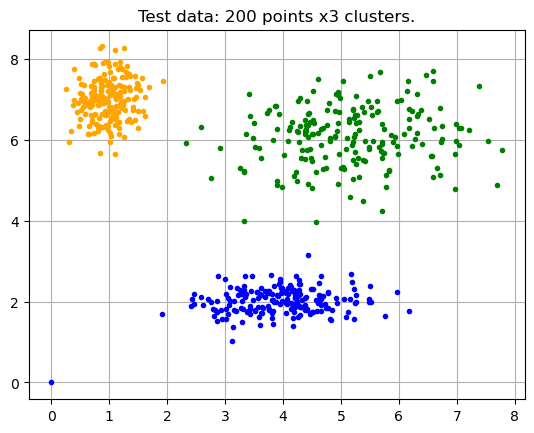

In [30]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')
ax0.grid(True)

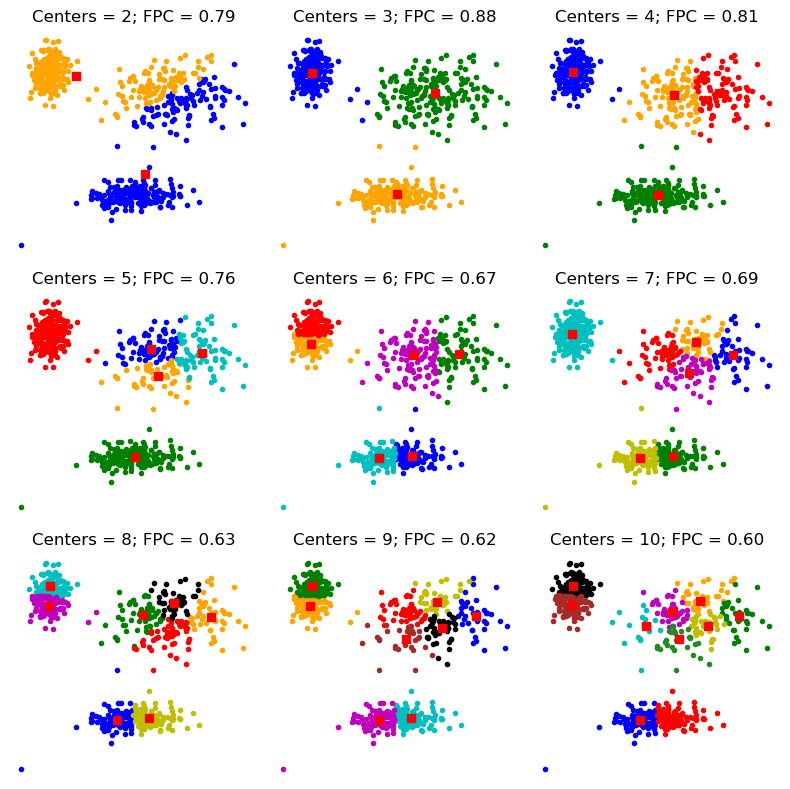

In [33]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')
    ax.grid(True)

fig1.tight_layout()

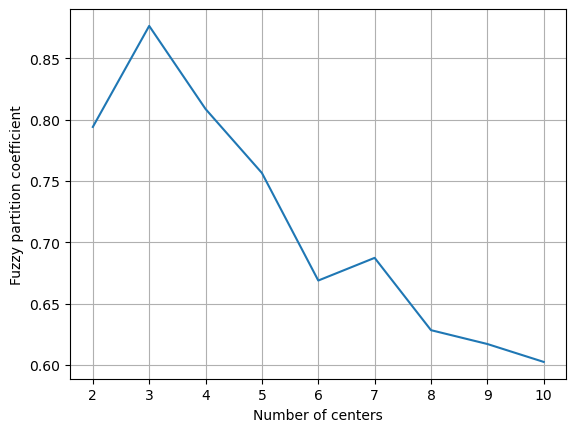

In [35]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")
ax2.grid(True)

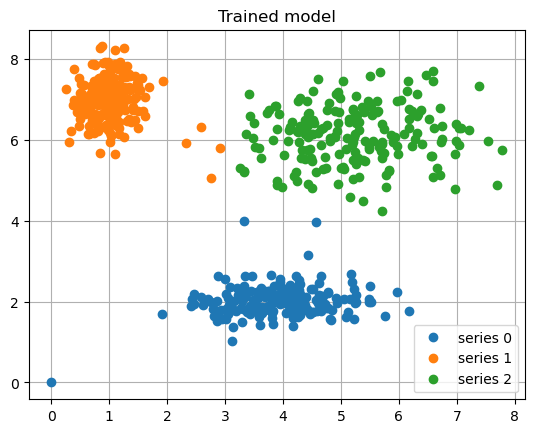

In [38]:
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000)

# Show 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()
ax2.grid(True)

# De Nouveau

In [39]:
X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
    [2, 1],
    [1, 2],
    [2, 2],
    [3, 2],
    [6, 6],
    [7, 6],
    [8, 6],
    [6, 7],
    [7, 7],
    [8, 7],
    [9, 7],
    [7, 8],
    [8, 8],
    [9, 8],
    [8, 9],
    [9, 9],
])

In [42]:
X_T = X.transpose()

In [47]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_T, 2, 2, error=0.005, maxiter=1000, init=None)

In [48]:
cntr

array([[1.23872424, 1.12505998],
       [7.68935917, 7.34833409]])

In [49]:
fpc

0.9523503556672399

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


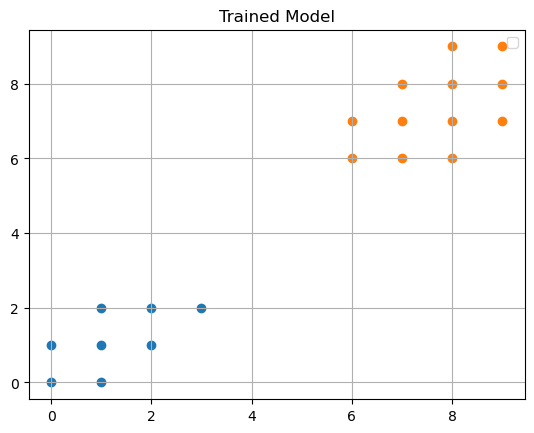

In [52]:
fig3, ax3 = plt.subplots()
ax3.set_title("Trained Model")
cluster_membership = np.argmax(u, axis=0)
for _ in range(3):
    ax3.scatter(X_T[0, cluster_membership == _], X_T[1, cluster_membership == _])

ax3.grid(True)